In [1]:
import pandas as pd

# ----- plot tools -----
import matplotlib.pyplot as plt
import seaborn as sns

# ----- sklean -----
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("CarPrice.xlsx")
data.head(10)

,ยี่ห้อ,ปีที่ออกขายครั้งแรก,ราคาขายมือสอง,กิโลเมตรที่ขับไปแล้ว,ประเภทเชื้อเพลิง,ประเภทผู้ขายรถ,ประเภทเกียร์,จำนวนเจ้าของรถในอดีต
0,Suzuki,2007,60000,70000.0,เบนซิน,เจ้าของขายเอง,Manual,3.0
1,Suzuki,2007,135000,50000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
2,Hyundai Verna 1.6 SX,2012,600000,100000.0,ดีเซล,เจ้าของขายเอง,Manual,1.0
3,Mitsubishi,2017,250000,46000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
4,Honda,2014,450000,141000.0,ดีเซล,เจ้าของขายเอง,Manual,2.0
5,Suzuki,2007,140000,125000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
7,Tata,2014,240000,60000.0,เบนซิน,เจ้าของขายเอง,Manual,2.0
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
9,Suzuki,2017,365000,78000.0,CNG,เจ้าของขายเอง,Manual,1.0


In [3]:
data.tail(10)

,ยี่ห้อ,ปีที่ออกขายครั้งแรก,ราคาขายมือสอง,กิโลเมตรที่ขับไปแล้ว,ประเภทเชื้อเพลิง,ประเภทผู้ขายรถ,ประเภทเกียร์,จำนวนเจ้าของรถในอดีต
499,Ford,2012,425000,81632.0,ดีเซล,เต๊นท์รถ,Manual,1.0
500,Ford,2016,600000,155201.0,ดีเซล,เต๊นท์รถ,Manual,1.0
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,NaN,,NaN,NaN,NaN,NaN,NaN,NaN


___

# Feature Engineering

## handling missing values

In [4]:
data.dropna(inplace=True)
data.shape[0]

501

## Duplicated data

In [5]:
data.drop_duplicates(inplace = True)
data.shape[0]

487

In [6]:
data = data.rename(columns={"ยี่ห้อ" : "Brand", 
                            "ประเภทเชื้อเพลิง" : "Fuel_Type",
                            "ประเภทผู้ขายรถ" : "Seller_Type",
                            "ประเภทเกียร์" : "Gear_Type",
                            "กิโลเมตรที่ขับไปแล้ว" : "Mileage",
                            "ปีที่ออกขายครั้งแรก" : "First_Sell_Year",
                            "ราคาขายมือสอง" : "Secondhand_Price",
                            "จำนวนเจ้าของรถในอดีต" : "Past_Owner"
                           })
data

,Brand,First_Sell_Year,Secondhand_Price,Mileage,Fuel_Type,Seller_Type,Gear_Type,Past_Owner
0,Suzuki,2007,60000,70000.0,เบนซิน,เจ้าของขายเอง,Manual,3.0
1,Suzuki,2007,135000,50000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
2,Hyundai Verna 1.6 SX,2012,600000,100000.0,ดีเซล,เจ้าของขายเอง,Manual,1.0
3,Mitsubishi,2017,250000,46000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
4,Honda,2014,450000,141000.0,ดีเซล,เจ้าของขายเอง,Manual,2.0
...,...,...,...,...,...,...,...,...
496,Ford,2019,700000,12586.0,เบนซิน,เต๊นท์รถ,Manual,1.0
497,Fiat,2018,650000,38083.0,ดีเซล,เต๊นท์รถ,Manual,1.0
498,Ford,2012,400000,55328.0,ดีเซล,เต๊นท์รถ,Manual,2.0
499,Ford,2012,425000,81632.0,ดีเซล,เต๊นท์รถ,Manual,1.0


In [7]:
data.nunique()

Brand               122
First_Sell_Year      24
Secondhand_Price    167
Mileage             158
Fuel_Type             4
Seller_Type           2
Gear_Type             2
Past_Owner            3
dtype: int64

### Feature : "Brand"

In [8]:
data.Brand.unique()

array(['Suzuki', 'Hyundai Verna 1.6 SX', 'Mitsubishi', 'Honda',
       'Hyundai Xcent 1.2 Kappa S', 'Tata', 'Hyundai Creta 1.6 VTVT S',
       'Chevrolet', 'Toyota', 'Hyundai Venue SX Opt ดีเซล',
       'Mercedes-Benz', 'Audi', 'Skoda', 'Toyota ',
       'Hyundai i10 Magna 1.1L', 'BMW', 'Hyundai Elantra CRDi S',
       'Mahindra Scorpio 1.99 S10', 'Mahindra Scorpio LX',
       'Hyundai Santro Xing GLS', 'Hyundai Grand i10 1.2 Kappa Asta',
       'Suzukii', 'Hyundai i20 Sportz 1.4 CRDi',
       'Hyundai i20 2015-2017 Sportz Option 1.4 CRDi',
       'Mahindra Jeep CL 500 MDI', 'Hyundai EON Magna Plus',
       'Mahindra Scorpio 1.99 S6 Plus', 'Ford', 'Hyundai i10 Sportz 1.2',
       'Hyundai Getz GLS', 'Nissan', 'Hyundai Grand i10 CRDi Sportz',
       'Hyundai Elite i20 ดีเซล Era', 'Hyundai Creta 1.6 SX Option',
       'Mahindra XUV500 W8 2WD', 'Hyundai Santro Xing XO',
       'Mahindra Bolero 2011-2019 SLE', 'Fiat', 'Volkswagen',
       'Volvo V40 D3 R Design', 'Mahindra Bolero Power Plu

In [9]:
data.Brand.str.split().str[0].unique()

array(['Suzuki', 'Hyundai', 'Mitsubishi', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Mercedes-Benz', 'Audi', 'Skoda', 'BMW', 'Mahindra',
       'Suzukii', 'Ford', 'Nissan', 'Fiat', 'Volkswagen', 'Volvo',
       'SuzukiI'], dtype=object)

In [10]:
data.loc[(data["Brand"] == "Suzukii") | (data["Brand"] == "SuzukiI"), "Brand"] = "Suzuki"

In [11]:
data["Model"] = data['Brand'].str.split().str[1]
data.head(5)

,Brand,First_Sell_Year,Secondhand_Price,Mileage,Fuel_Type,Seller_Type,Gear_Type,Past_Owner,Model
0,Suzuki,2007,60000,70000.0,เบนซิน,เจ้าของขายเอง,Manual,3.0,NaN
1,Suzuki,2007,135000,50000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0,NaN
2,Hyundai Verna 1.6 SX,2012,600000,100000.0,ดีเซล,เจ้าของขายเอง,Manual,1.0,Verna
3,Mitsubishi,2017,250000,46000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0,NaN
4,Honda,2014,450000,141000.0,ดีเซล,เจ้าของขายเอง,Manual,2.0,NaN


In [12]:
data.loc[ :,'Brand'] = data['Brand'].str.split().str[0]
data.head(5)

,Brand,First_Sell_Year,Secondhand_Price,Mileage,Fuel_Type,Seller_Type,Gear_Type,Past_Owner,Model
0,Suzuki,2007,60000,70000.0,เบนซิน,เจ้าของขายเอง,Manual,3.0,NaN
1,Suzuki,2007,135000,50000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0,NaN
2,Hyundai,2012,600000,100000.0,ดีเซล,เจ้าของขายเอง,Manual,1.0,Verna
3,Mitsubishi,2017,250000,46000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0,NaN
4,Honda,2014,450000,141000.0,ดีเซล,เจ้าของขายเอง,Manual,2.0,NaN


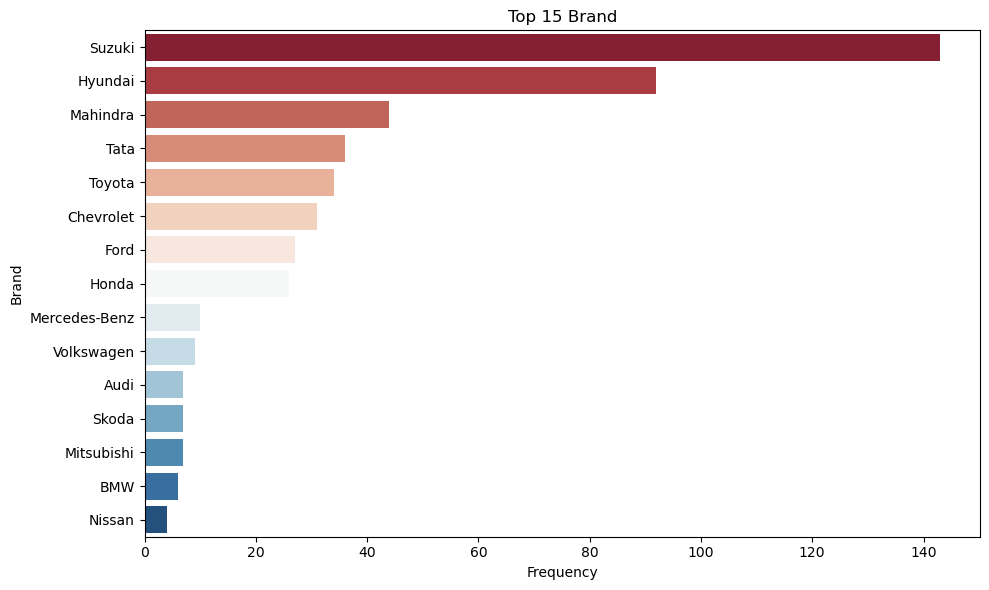

In [13]:
top_Brand = data["Brand"].str.split().str[0].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_Brand.values, 
    y=top_Brand.index, 
    palette="RdBu",
)
plt.title(f'Top 15 Brand')
plt.xlabel("Frequency")
plt.ylabel("Brand")
plt.tight_layout()
#
plt.savefig("Top_15_Brand.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
# add new feature : Age 
data["Age"] = 2024 - data["First_Sell_Year"]

data.Past_Owner = data.Past_Owner.astype(int)

## Handling Outler

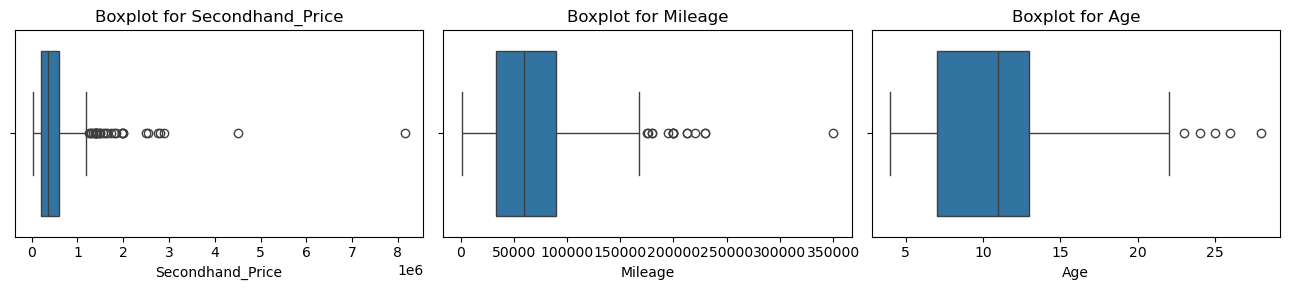

In [15]:
num_cols = ["Secondhand_Price", "Mileage","Age"]
fig = plt.figure(figsize=[13,3])

for idx, col in enumerate(num_cols):  # วนลูปไปตามคอลัมน์ใน num_cols
    plt.subplot(1, 3, idx+1)  # สร้าง subplot ตามตำแหน่ง
    sns.boxplot(x=col, data=data)
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
#
plt.savefig("Boxplot_feature.png", dpi=300, bbox_inches="tight")
plt.show()

In [16]:
data = data[(data["Secondhand_Price"] < data["Secondhand_Price"].quantile(0.99)) &
            (data["Mileage"] < data["Mileage"].quantile(0.99))]

___

## Endcoding

In [17]:
le = LabelEncoder()
data["Brand"] = le.fit_transform(data["Brand"])
data["Model"] = le.fit_transform(data["Model"])

# Type feature (categorical columns)
data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Gear_Type'], drop_first=True)
columns_to_int = ['Fuel_Type_LPG', 'Fuel_Type_ดีเซล', 'Fuel_Type_เบนซิน', 
                  'Gear_Type_Manual', 'Seller_Type_เต๊นท์รถ']

data[columns_to_int] = data[columns_to_int].astype(int)

data = data.rename(columns={"Fuel_Type_ดีเซล" : "Fuel_Type_diesel", 
                            "Fuel_Type_เบนซิน" : "Fuel_Type_benzine",
                            "Seller_Type_เต๊นท์รถ" : "Seller_Type_Dealership",
                           })
data.head(5)

,Brand,First_Sell_Year,Secondhand_Price,Mileage,Past_Owner,Model,Age,Fuel_Type_LPG,Fuel_Type_diesel,Fuel_Type_benzine,Seller_Type_Dealership,Gear_Type_Manual
0,12,2007,60000,70000.0,3,25,17,0,0,1,0,1
1,12,2007,135000,50000.0,1,25,17,0,0,1,0,1
2,6,2012,600000,100000.0,1,18,12,0,1,0,0,1
3,9,2017,250000,46000.0,1,25,7,0,0,1,0,1
4,5,2014,450000,141000.0,2,25,10,0,1,0,0,1


# Training Model

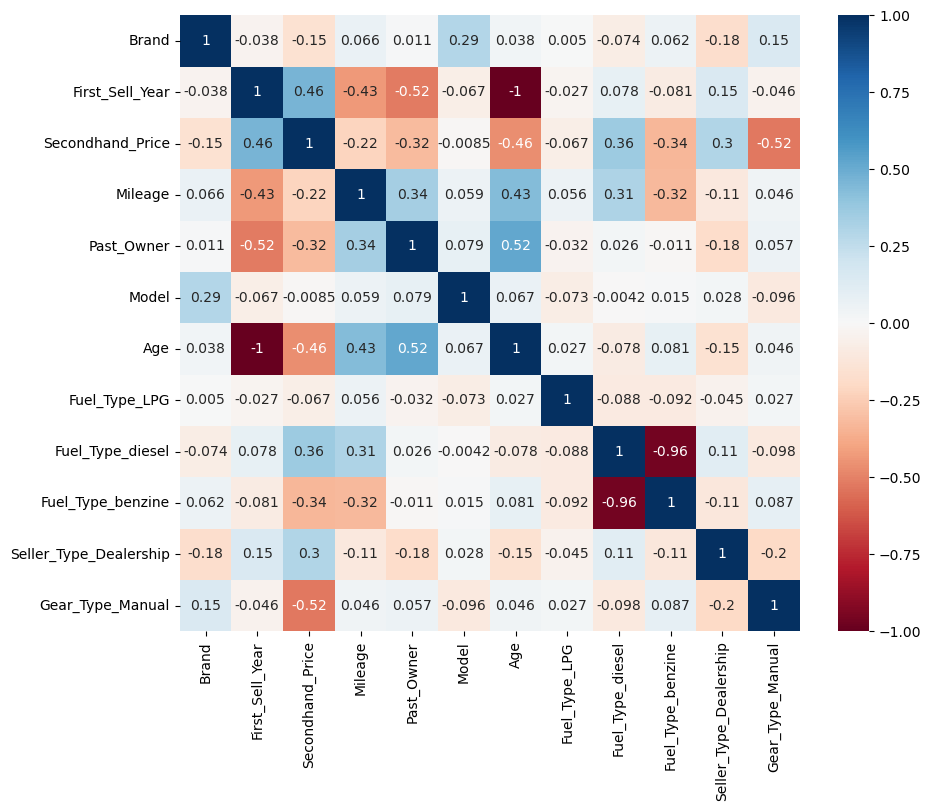

In [18]:
# Correlation 
plt.figure(figsize=(10, 8)) 
sns.heatmap(data.corr(), annot=True, cmap="RdBu", annot_kws={"size": 10})
#plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [19]:
feature = ["Brand", "Age", "Mileage", "Fuel_Type_LPG", "Fuel_Type_diesel", "Fuel_Type_benzine",
           "Past_Owner", "Model", "Seller_Type_Dealership", "Gear_Type_Manual"]
label = "Secondhand_Price"

In [20]:
X = data[feature]
y = data["Secondhand_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_00 = DecisionTreeRegressor(random_state=12)
model_00.fit(X_train, y_train)

y_pred = model_00.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 : ", r2)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

R^2 :  0.5639220733178109
Mean Squared Error :  61125178515.65885
Mean Absolute Error :  161484.36979166666


In [21]:
X = data[feature]
y = data["Secondhand_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model_00 = DecisionTreeRegressor(random_state=12)
model_00.fit(X_train, y_train)

y_pred = model_00.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 : ", r2)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

R^2 :  0.5812274661516493
Mean Squared Error :  78634873654.51833
Mean Absolute Error :  178722.5392670157


In [22]:
feature = ["Brand", "Mileage", "Fuel_Type_LPG", "Fuel_Type_diesel", "Fuel_Type_benzine",
          "Gear_Type_Manual", "Age","Seller_Type_Dealership"]
label = "Secondhand_Price"

In [23]:
X = data[feature]
y = data["Secondhand_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model_01 = DecisionTreeRegressor(random_state=12)
model_01.fit(X_train, y_train)

y_pred = model_01.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 : ", r2)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

R^2 :  0.6422387805130308
Mean Squared Error :  67178494335.141365
Mean Absolute Error :  176808.9005235602


In [24]:
model_02 = DecisionTreeRegressor(max_depth=5,random_state=14)
model_02.fit(X_train, y_train)
y_pred = model_02.predict(X_test)

# คำนวณ R^2, MSE, MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 : ", r2)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

R^2 :  0.7312631868163124
Mean Squared Error :  50461965967.11306
Mean Absolute Error :  150597.88472983983


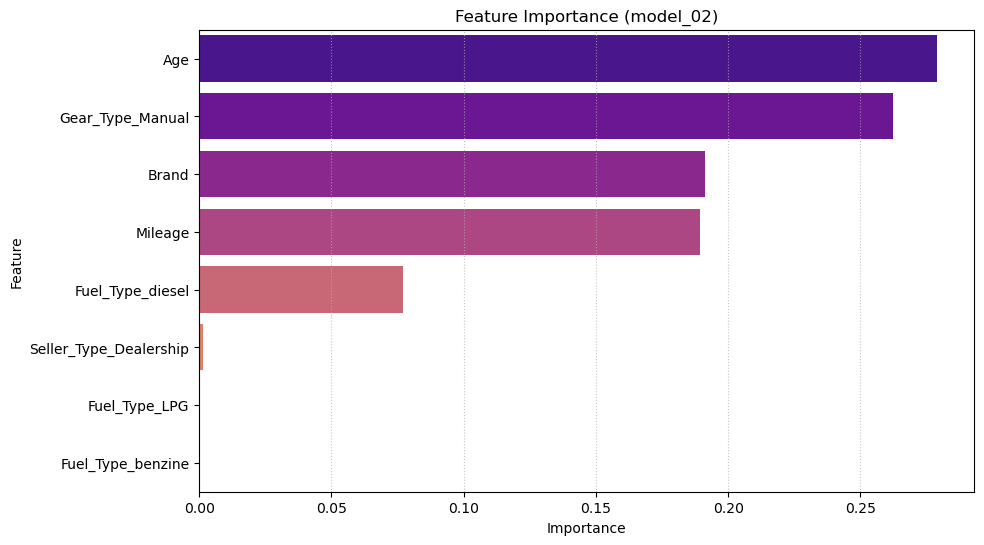

In [25]:
feature_importances = model_02.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', 
            y='Feature', 
            data=importance_df, 
            palette='plasma', 
            hue='Feature')
plt.title('Feature Importance (model_02)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle=':', alpha=0.7)
#plt.savefig("Feature_Importance_model02.png", dpi=300, bbox_inches="tight")
plt.show()

# Hyperparameter tuning

In [26]:
param_grid = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2, 3, 4 , 5, 6, 10],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
bestmodel = grid_search.best_estimator_

r2_score = bestmodel.score(X_test, y_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R2 score of the best model on test data:", r2_score)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
R2 score of the best model on test data: 0.5688771495867699
Mean Squared Error :  50461965967.11306
Mean Absolute Error :  150597.88472983983
